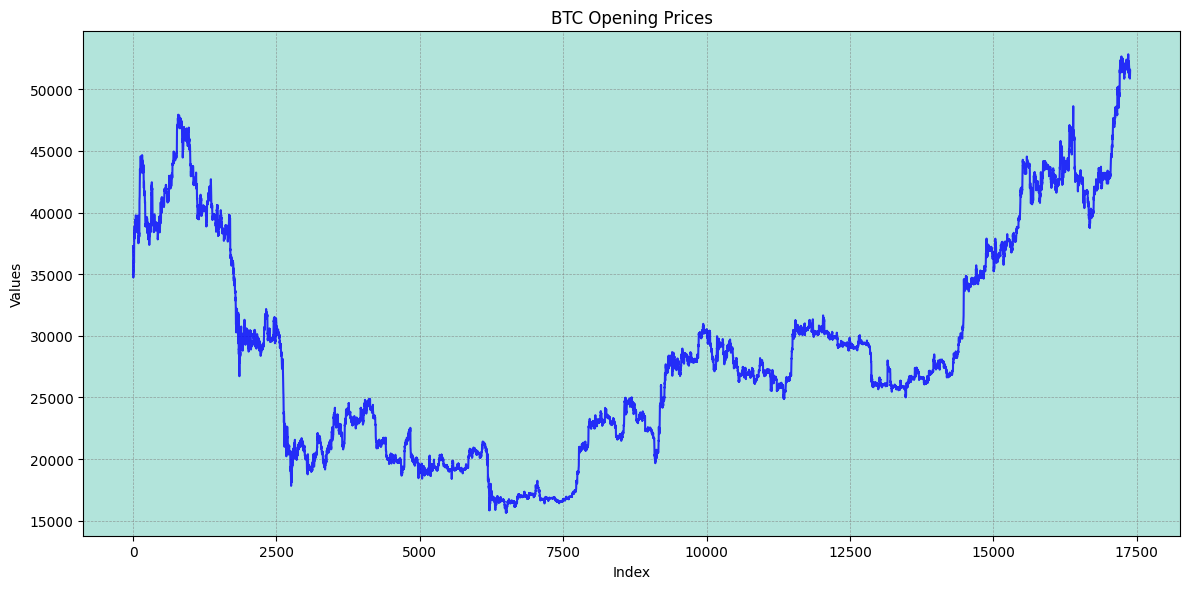

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# 设置全局的配置参数
background_color = '#48C0AA' + '6A'  # 定义背景颜色（带透明度）
plt.rcParams['figure.facecolor'] = 'none'  # 设置图表背景色为透明
plt.rcParams['figure.figsize'] = (12, 6)   # 设置图表大小
plt.rcParams['figure.autolayout'] = True   # 自动调整布局
plt.rcParams['axes.facecolor'] = background_color  # 设置坐标轴背景色

# 读取真实值CSV文件
real_data = pd.read_csv('./btc_data.csv')
real_values = real_data.iloc[:, 4]  # 假设真实值在CSV文件的第四列

# 绘制对照图，设置线条颜色为蓝色
plt.plot(real_values, color='blue', alpha=0.8)  # 设置透明度为 0.8
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('BTC Opening Prices')

# 添加灰色网格线
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# 保存图像
plt.savefig('BTC Opening Prices.png')

# 显示图像
plt.show()


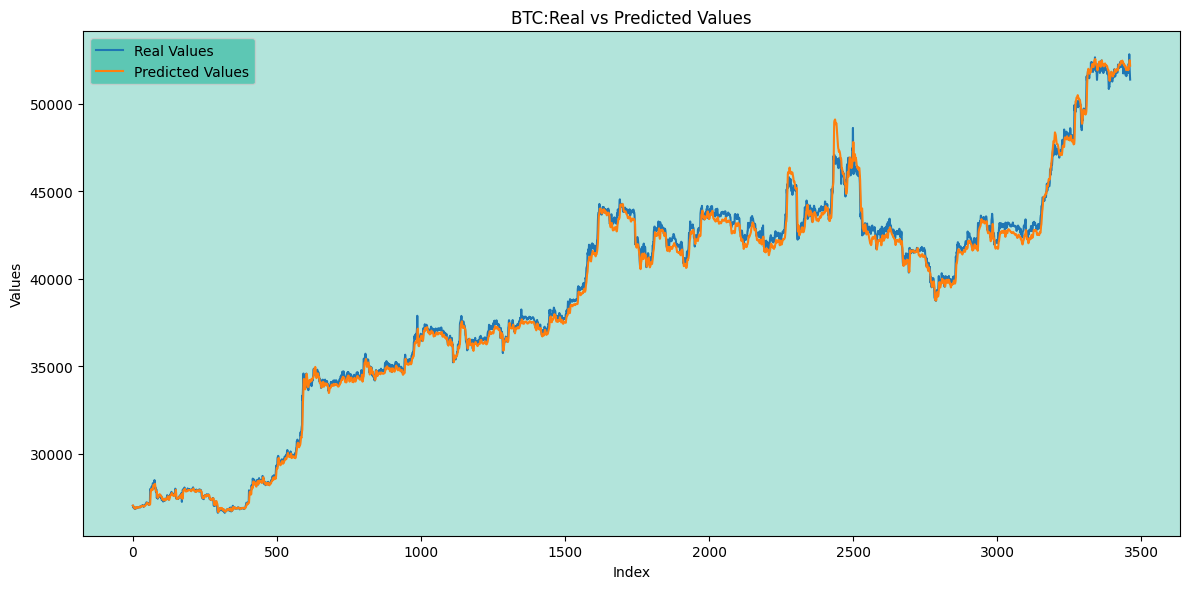

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# 设置全局的配置参数
background_color = '#48C0AA'  +'6A'#定义背景颜色
plt.rcParams['figure.facecolor'] = 'none'  # 设置图表背景色为透明
plt.rcParams['figure.figsize'] = (12, 6)    # 设置图表大小
plt.rcParams['figure.autolayout'] = True    # 自动调整布局
plt.rcParams['axes.facecolor'] = background_color  # 设置坐标轴背景色

# 读取真实值CSV文件
real_data = pd.read_csv('192-48-48/btc(1924848)-test-true240.csv')
real_values = real_data.iloc[:, 1]  # 假设真实值在CSV文件的第一列

# 读取预测值CSV文件
predicted_data = pd.read_csv('192-48-48/btc(1924848)-test240.csv')
predicted_values = predicted_data.iloc[:, 1]  # 假设预测值在CSV文件的第一列

# 绘制对照图
plt.plot(real_values, label='Real Values')
plt.plot(predicted_values, label='Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('BTC:Real vs Predicted Values')
plt.legend()
plt.savefig('BTC:Real vs Predicted Values.png')
plt.show()

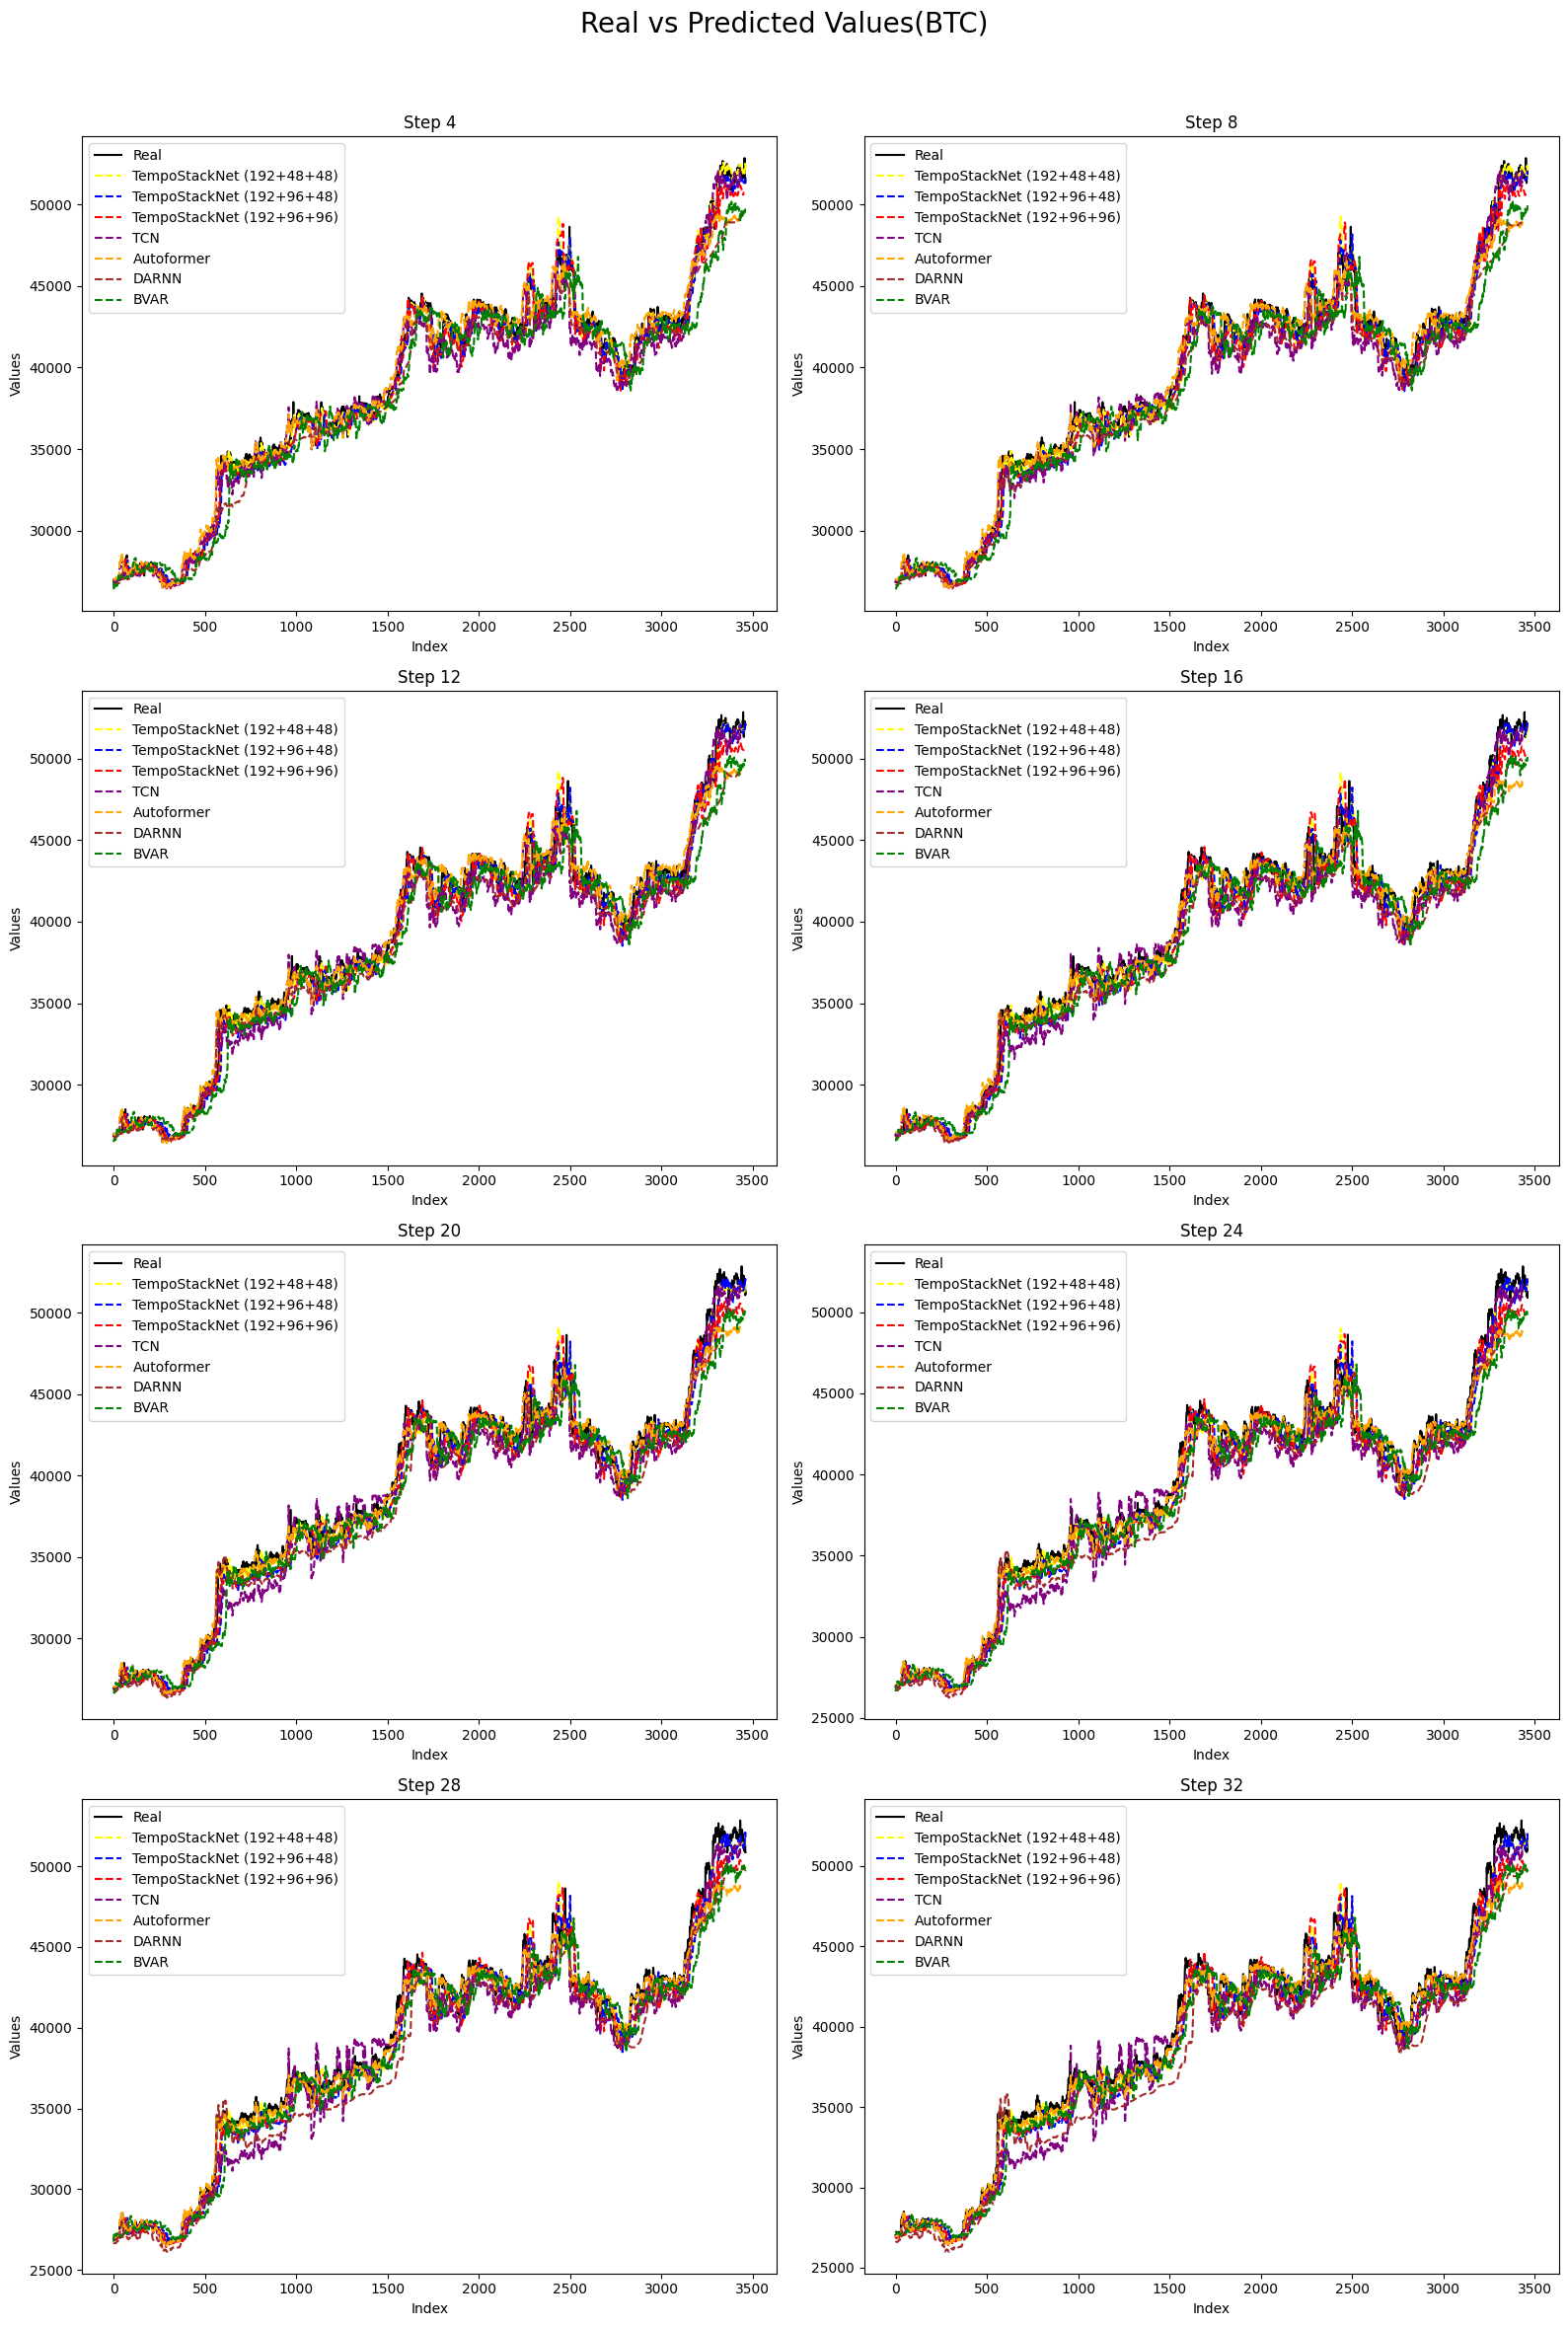

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 创建一个空的 DataFrame 来存储所有真实值和预测值
all_real_values = pd.DataFrame()
all_predicted_values = {}

# 读取真实值CSV文件
real_data = pd.read_csv('192-48-48/btc(1924848)-test-true240.csv')

# 预测文件和对应模型名称
predicted_files_and_names = [
    ('192-48-48/btc(1924848)-test240.csv', 'TempoStackNet (192+48+48)'),
    ('192-96-48/btc(1929648)-test335.csv', 'TempoStackNet (192+96+48)'),
    ('192-96-96/btc(1929696)-test245.csv', 'TempoStackNet (192+96+96)'),
    ('TCN192/btc(TCN192)-test925.csv', 'TCN'),
    ('fzAutoformer192/btc(Autoformer192)-test265.csv', 'Autoformer'),
    ('DARNN192/btc(DARNN192)-test265.csv', 'DARNN'),
    ('BVAR192-48-48/btc(1924848)-test225.csv', 'BVAR')
]

# 读取真实值并存储到 DataFrame
for i in range(32):  # 假设有32列数据
    all_real_values[f'Real_{i}'] = real_data.iloc[:, i]

# 读取每个预测值CSV文件，并存储到一个字典中
for file, model_name in predicted_files_and_names:
    predicted_data = pd.read_csv(file)
    temp_df = pd.DataFrame()
    for i in range(32):  # 假设有32列数据
        temp_df[f'Predicted_{i}'] = predicted_data.iloc[:, i]
    all_predicted_values[model_name] = temp_df

# 创建组图，分别绘制第3, 7, 11, 15, 19, 23, 27, 31步的数据
steps_to_plot = [3, 7, 11, 15, 19, 23, 27, 31]  # 使用0索引
num_steps = len(steps_to_plot)

# 创建包含多个子图的图表
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16, 24))  # 4行2列的子图
axs = axs.flatten()  # 将子图数组展平以便于迭代

# 扩展颜色列表，以涵盖所有预测文件
colors = ['yellow', 'blue', 'red', 'purple', 'orange', 'brown', 'green']

for i, step in enumerate(steps_to_plot):
    ax = axs[i]
    ax.plot(all_real_values[f'Real_{step}'], label=f'Real', color='black')
    
    for idx, (model_name, predicted_df) in enumerate(all_predicted_values.items()):
        ax.plot(predicted_df[f'Predicted_{step}'], linestyle='--', label=f'{model_name}', color=colors[idx])
    
    ax.set_title(f'Step {step + 1}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Values')
    ax.legend()

plt.suptitle('Real vs Predicted Values(BTC)', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # 调整布局，确保标题不会重叠
plt.savefig('Real vs Predicted Values(BTC)_V2.png')
plt.show()

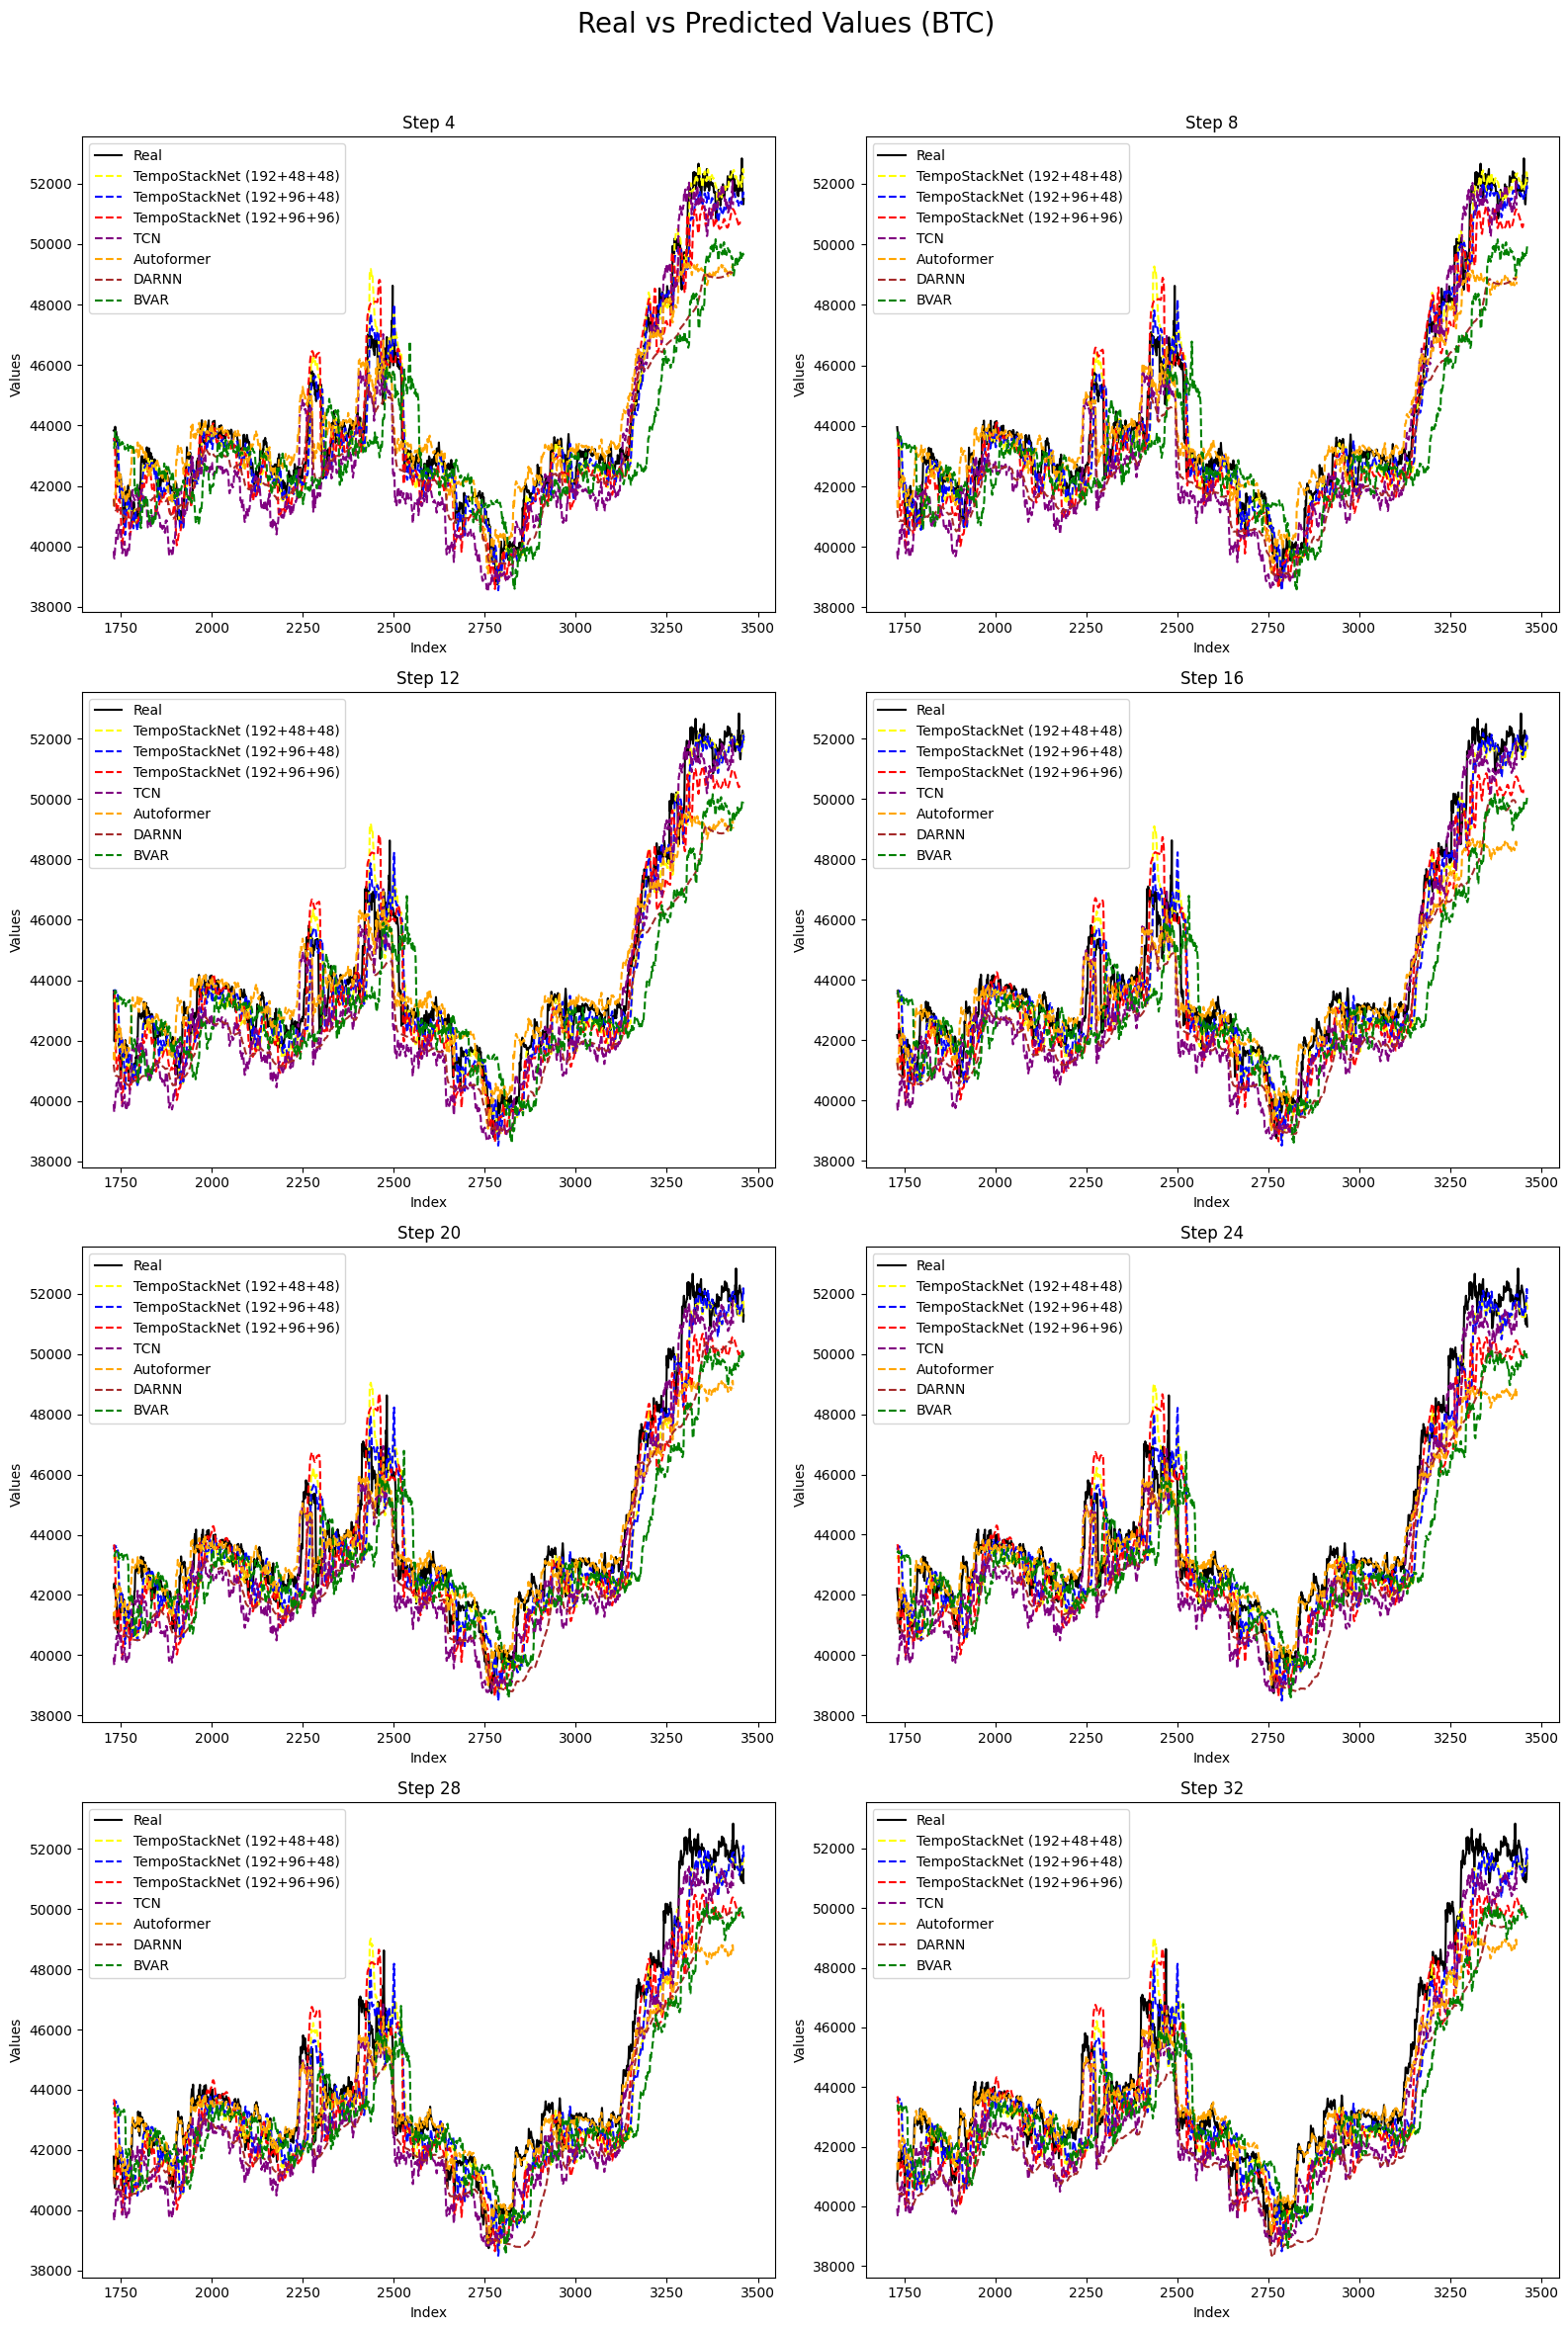

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 创建一个空的 DataFrame 来存储所有真实值和预测值
all_real_values = pd.DataFrame()
all_predicted_values = {}

# 读取真实值CSV文件
real_data = pd.read_csv('192-48-48/btc(1924848)-test-true240.csv')

# 预测文件和对应模型名称
predicted_files_and_names = [
    ('192-48-48/btc(1924848)-test240.csv', 'TempoStackNet (192+48+48)'),
    ('192-96-48/btc(1929648)-test335.csv', 'TempoStackNet (192+96+48)'),
    ('192-96-96/btc(1929696)-test245.csv', 'TempoStackNet (192+96+96)'),
    ('TCN192/btc(TCN192)-test925.csv', 'TCN'),
    ('fzAutoformer192/btc(Autoformer192)-test265.csv', 'Autoformer'),
    ('DARNN192/btc(DARNN192)-test265.csv', 'DARNN'),
    ('BVAR192-48-48/btc(1924848)-test225.csv', 'BVAR')
]

# 读取真实值并存储到 DataFrame
for i in range(32):  # 假设有32列数据
    all_real_values[f'Real_{i}'] = real_data.iloc[:, i]

# 读取每个预测值CSV文件，并存储到一个字典中
for file, model_name in predicted_files_and_names:
    predicted_data = pd.read_csv(file)
    temp_df = pd.DataFrame()
    for i in range(32):  # 假设有32列数据
        temp_df[f'Predicted_{i}'] = predicted_data.iloc[:, i]
    all_predicted_values[model_name] = temp_df

# 创建组图，分别绘制第3, 7, 11, 15, 19, 23, 27, 31步的数据
steps_to_plot = [3, 7, 11, 15, 19, 23, 27, 31]  # 使用0索引
num_steps = len(steps_to_plot)

# 计算数据的后50%
half_index = int(len(all_real_values) * 0.5)
all_real_values = all_real_values.iloc[half_index:]  # 只取后50%的数据

# 创建包含多个子图的图表
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16, 24))  # 4行2列的子图
axs = axs.flatten()  # 将子图数组展平以便于迭代

# 扩展颜色列表，以涵盖所有预测文件
colors = ['yellow', 'blue', 'red', 'purple', 'orange', 'brown', 'green']

for i, step in enumerate(steps_to_plot):
    ax = axs[i]
    ax.plot(all_real_values[f'Real_{step}'], label=f'Real', color='black')
    
    for idx, (model_name, predicted_df) in enumerate(all_predicted_values.items()):
        # 获取 'Predicted_{step}' 列的整数位置
        predicted_col_idx = predicted_df.columns.get_loc(f'Predicted_{step}')
        
        # 仅绘制后50%部分的数据
        ax.plot(predicted_df.iloc[half_index:, predicted_col_idx], linestyle='--', label=f'{model_name}', color=colors[idx])
    
    ax.set_title(f'Step {step + 1}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Values')
    ax.legend()

plt.suptitle('Real vs Predicted Values (BTC)', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # 调整布局，确保标题不会重叠
plt.savefig('Real_vs_Predicted_Values_Last_50_BTC_V2.png')
plt.show()

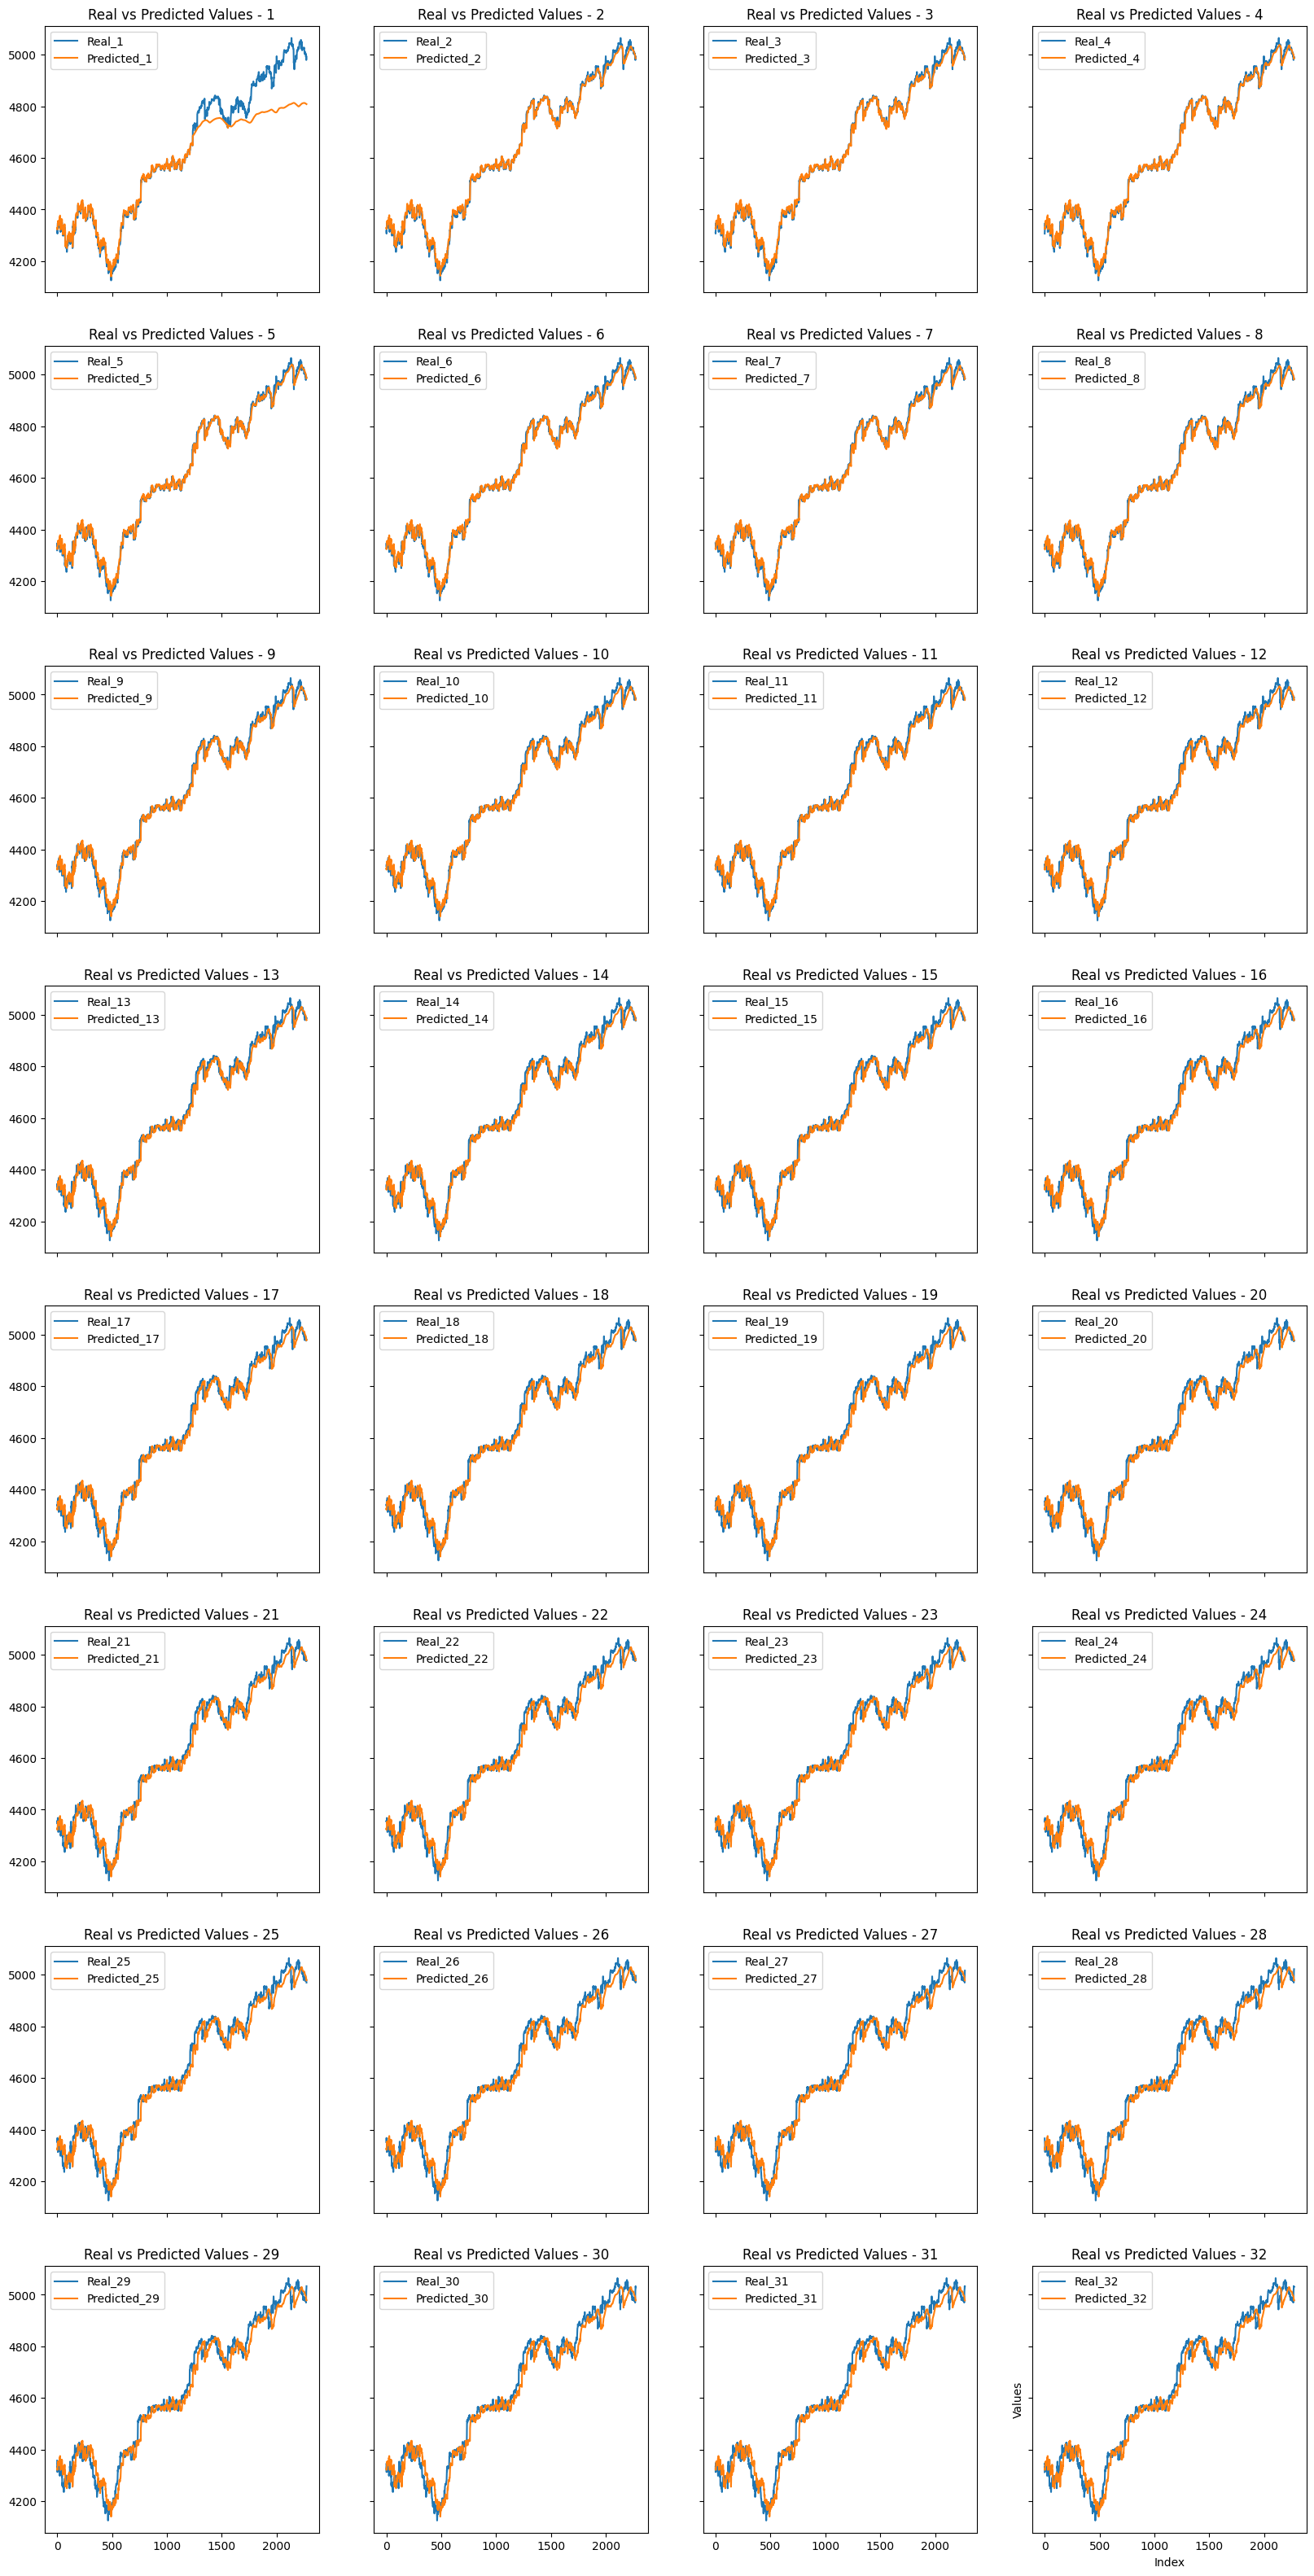

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# 创建一个空的 DataFrame 来存储所有真实值和预测值
all_real_values = pd.DataFrame()
all_predicted_values = pd.DataFrame()

real_data = pd.read_csv(f'sp500(1929648)-test-true530.csv')
predicted_data = pd.read_csv(f'sp500(1929648)-test530.csv')
# 读取每个真实值CSV文件，并存储第一列
for i in range(32):  # 假设有32个文件
    all_real_values[f'Real_{i + 1}'] = real_data.iloc[:, i]

# 读取每个预测值CSV文件，并存储第一列
for i in range(32):  # 假设有32个文件
    all_predicted_values[f'Predicted_{i + 1}'] = predicted_data.iloc[:, i]

# 绘制对照图
fig, axs = plt.subplots(8, 4, figsize=(20, 40), sharex=True, sharey=True)

for i in range(8):
    for j in range(4):
        idx = i * 4 + j
        axs[i, j].plot(all_real_values[f'Real_{idx + 1}'], label=f'Real_{idx + 1}')
        axs[i, j].plot(all_predicted_values[f'Predicted_{idx + 1}'], label=f'Predicted_{idx + 1}')
        axs[i, j].set_title(f'Real vs Predicted Values - {idx + 1}')
        axs[i, j].legend()

plt.xlabel('Index')
plt.ylabel('Values')
plt.savefig('real_vs_predicted_values1929648.png')
plt.show()


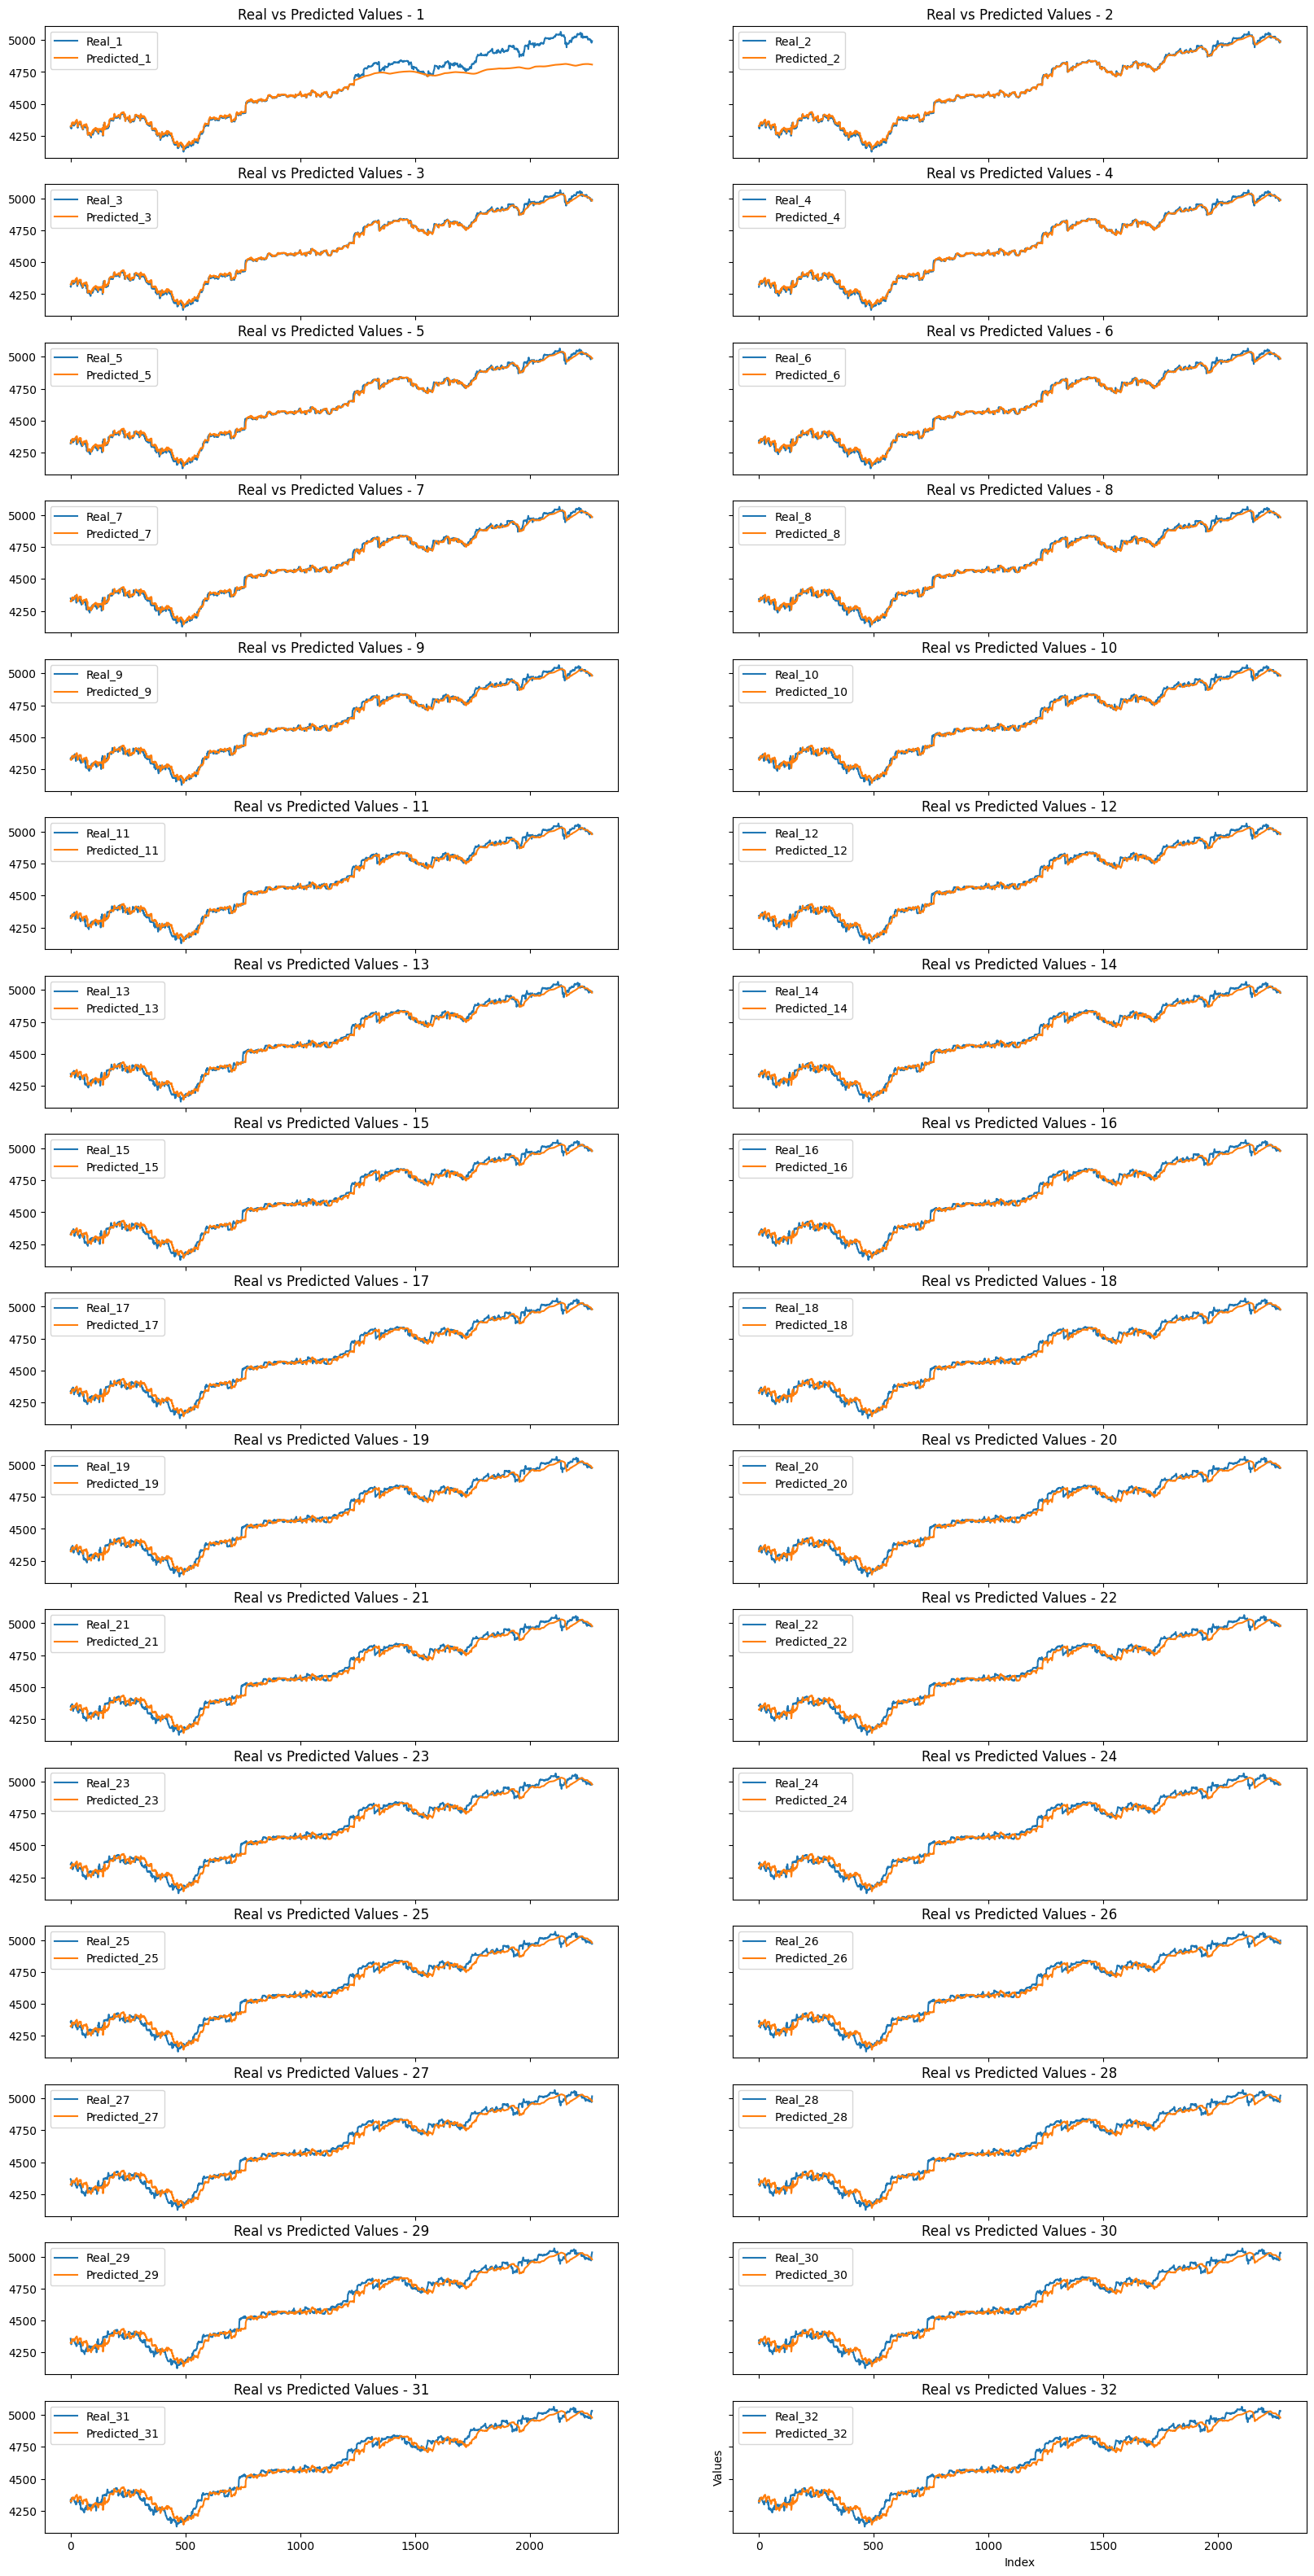

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# 创建一个空的 DataFrame 来存储所有真实值和预测值
all_real_values = pd.DataFrame()
all_predicted_values = pd.DataFrame()

real_data = pd.read_csv(f'sp500(1929648)-test-true530.csv')
predicted_data = pd.read_csv(f'sp500(1929648)-test530.csv')
# 读取每个真实值CSV文件，并存储第一列
for i in range(32):  # 假设有32个文件
    all_real_values[f'Real_{i + 1}'] = real_data.iloc[:, i]

# 读取每个预测值CSV文件，并存储第一列
for i in range(32):  # 假设有32个文件
    all_predicted_values[f'Predicted_{i + 1}'] = predicted_data.iloc[:, i]

# 绘制对照图
fig, axs = plt.subplots(16, 2, figsize=(20, 40), sharex=True, sharey=True)

for i in range(16):
    for j in range(2):
        idx = i * 2 + j
        axs[i, j].plot(all_real_values[f'Real_{idx + 1}'], label=f'Real_{idx + 1}')
        axs[i, j].plot(all_predicted_values[f'Predicted_{idx + 1}'], label=f'Predicted_{idx + 1}')
        axs[i, j].set_title(f'Real vs Predicted Values - {idx + 1}')
        axs[i, j].legend()

plt.xlabel('Index')
plt.ylabel('Values')
plt.savefig('real_vs_predicted_values1929648_2.png')
plt.show()